In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn .model_selection import train_test_split
from sklearn.metrics import r2_score,root_mean_squared_error,mean_squared_error

In [ ]:
df=pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['sex']=df['sex'].replace({'female':0,'male':1})

/tmp/ipython-input-2421098784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex']=df['sex'].replace({'female':0,'male':1})


In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['region']=df['region'].replace({'southwest':0,'southeast':1, 'northwest':2,'northeast':3})

/tmp/ipython-input-4112431223.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['region']=df['region'].replace({'southwest':0,'southeast':1, 'northwest':2,'northeast':3})


In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['smoker']=df['smoker'].replace({'yes':1,'no':0})

/tmp/ipython-input-4038739953.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker']=df['smoker'].replace({'yes':1,'no':0})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
df.corr()['charges']

,charges
age,0.299008
sex,0.057292
bmi,0.198341
children,0.067998
smoker,0.787251
region,0.006208
charges,1.000000


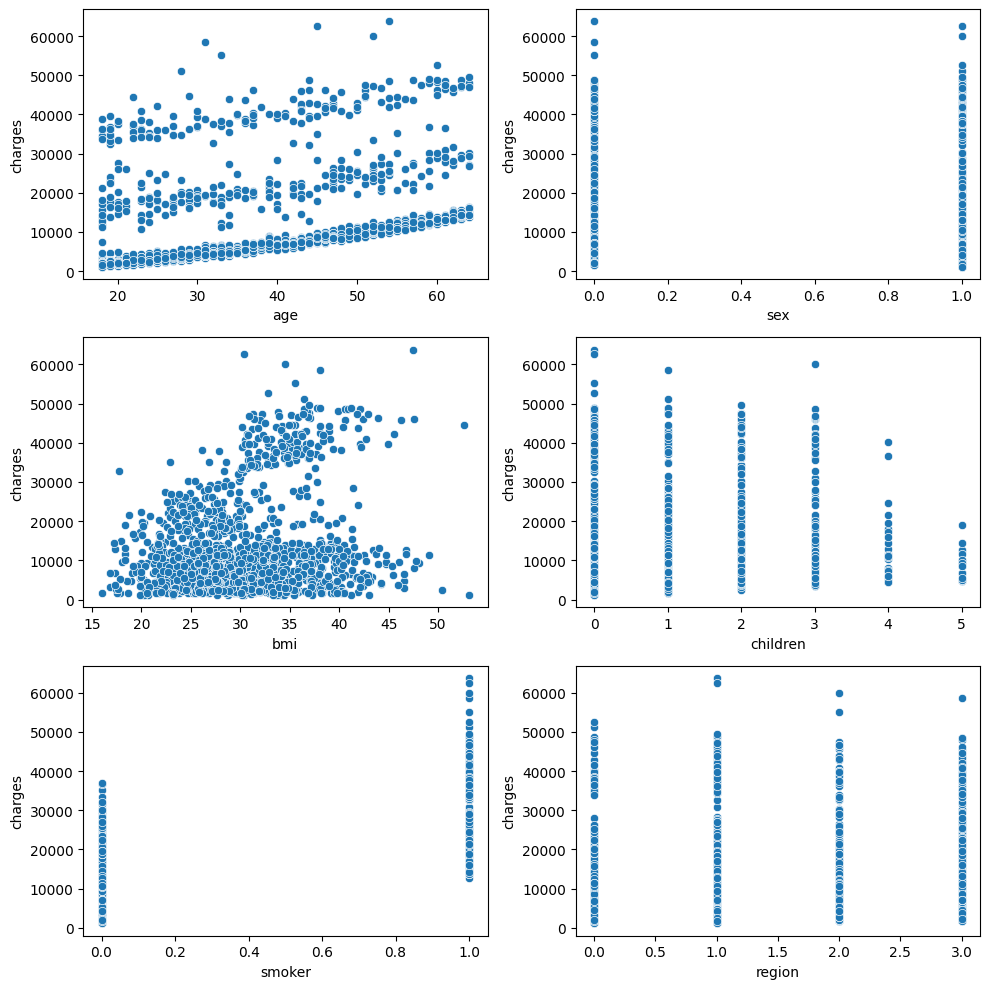

In [ ]:
f,a=plt.subplots(3,2,figsize=(10,10))
sns.scatterplot(data=df,x='age',y='charges',ax=a[0][0])
sns.scatterplot(data=df,x='sex',y='charges',ax=a[0][1])
sns.scatterplot(data=df,x='bmi',y='charges',ax=a[1][0])
sns.scatterplot(data=df,x='children',y='charges',ax=a[1][1])
sns.scatterplot(data=df,x='smoker',y='charges',ax=a[2][0])
sns.scatterplot(data=df,x='region',y='charges',ax=a[2][1])
plt.tight_layout()
plt.show()

In [ ]:
x=df.drop('charges',axis=1)
y=df['charges']

# charges is dependent variable
# all other columns are independent variables

In [ ]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,1
1336,21,0,25.800,0,0,0


In [ ]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=24)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
model.intercept_

np.float64(-13273.982610564035)

In [ ]:
model.coef_

array([  252.75487996,   -81.75073192,   358.36530781,   410.61329182,
       23551.14202087,   298.8689258 ])

In [ ]:
xtest

,age,sex,bmi,children,smoker,region
736,37,0,38.390,0,1,1
561,54,0,32.680,0,0,3
930,26,1,46.530,1,0,1
271,50,1,34.200,2,1,0
933,45,0,35.300,0,0,0
...,...,...,...,...,...,...
849,55,1,32.775,0,0,2
483,51,0,39.500,1,0,0
537,46,0,30.200,2,0,0
893,47,1,38.940,2,1,1


In [ ]:
ytest

,charges
736,40419.01910
561,10923.93320
930,2927.06470
271,42856.83800
933,7348.14200
...,...
849,10601.63225
483,9880.06800
537,8825.08600
893,44202.65360


In [ ]:
model.score(xtrain,ytrain)#74% model predicted correct values on trained data

0.7434426964668961

In [ ]:
model.score(xtest,ytest)#77% model predicted correct values on test data

0.7765389470136033

In [ ]:
y_pred=model.predict(xtrain)

In [ ]:
y_pred1=model.predict(xtest)

In [ ]:
train_score=r2_score(ytrain,y_pred)
train_score

0.7434426964668961

In [ ]:
train_score=r2_score(ytest,y_pred1)
train_score

0.7765389470136033

#Average goodfit

In [ ]:
mean_squared_error(ytrain,y_pred)

37222874.76859435

In [ ]:
rmse=root_mean_squared_error(ytrain,y_pred)
np.sqrt(rmse)

np.float64(78.10925180560864)

In [ ]:
mean_squared_error(ytest,y_pred1)

34016339.8672191

In [ ]:
rmse1=root_mean_squared_error(ytest,y_pred1)
np.sqrt(rmse1)

np.float64(76.36984259902567)

In [ ]:
target_mean=ytest.mean()
target_mean

np.float64(12943.048193097015)

In [ ]:
target_mean1=ytrain.mean()
target_mean1

np.float64(13352.418761690653)

In [ ]:
model_evaluation=rmse/target_mean
model_evaluation

np.float64(0.47137699918987275)

# mse is high so model is making more mistakes on test data

In [ ]:
model_evaluation1=rmse1/target_mean1
model_evaluation1

np.float64(0.43680122400995447)

#mse is low on train data